# Perceptron Lab

This is the scaffold notebook for the perceptron lab and each lab will have a similar scaffold.  Make your own copy of this notebook and then you can fill in the tasks.  **You will fill in code boxes and test boxes with discussion for most tasks** and particularly discussion of results, graphs, etc. Good writing, grammar, punctuation, etc. are important and points will be taken off if these things are lacking.

In most cases just reporting results without discussion will not receive full credit. Thus, your discussion should also include sentences like the following: This is because…  Note that the …  I was surprised to observe… I am not sure why …, but my hypothesis is that …

Start by looking over the scikit-learn [user guide](https://scikit-learn.org/stable/user_guide.html) and carefully reading over the [perceptron documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html).

In [2]:
# imports
import numpy as np
from scipy.io import arff
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
def GetData(filename):
  Data_Set = arff.loadarff(filename)
  Data_Set_df = pd.DataFrame(Data_Set[0])
  Data_Set_np = Data_Set_df.to_numpy()
  Data_Set_np = Data_Set_np.astype(float)
  X = Data_Set_np[:, :-1]
  y = Data_Set_np[:, -1]
  return X, y

def Train(filename, eta=0.1, maxIter=None):
  if maxIter:
    clf = Perceptron(shuffle=False, verbose=0, eta0=eta, max_iter=maxIter)
  else:
    clf = Perceptron(shuffle=False, verbose=0, eta0=0.1)
  X, y = GetData(filename)
  clf.fit(X, y)
  return clf, X, y

## 1. Debug and Evaluation

For most labs we will give you some data and expected results so that you can verify that you are doing things right and getting appropriate results.  We will then have you run on some other data with the exact same hyperparameters so we can see if your results are correct.

### 1.1 Debug (5%)
Download this [data set](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/linsep2nonorigin.arff) into your local directory and name it debug.arff.  To download rather than view, right-click the link and save as.  To allow consistent results run the Perceptron using the following hyperparameters:
- Learning rate = .1
- Do NOT shuffle the data after every epoch like you would normally do
- Learn for a maximum of 10 epochs
- Start all weights at 0 (which is the default for this scikit-learn implementation)  

Your results should be:
Accuracy = [.875]\
Final Weights = [[-0.23  0.18]]\
[-0.1] - This last weight is the bias weight, which they call the intercept.

To help you with this first task, following is one detailed variation that would do this for you. You may use your own variation.  Note that commonly used variable names in the community are clf (classifier), X (array of input features), y (vector of output labels).

In [4]:
clf, X, y = Train("debug.arff", 10)

print("Weights: ", clf.coef_)
print("Intercept: ", clf.intercept_)
print("Accuracy: ", clf.score(X, y))

Weights:  [[-0.24  0.2 ]]
Intercept:  [-0.1]
Accuracy:  1.0


Notes:
* If you increase (or just remove) max_iter your perceptron will converge to 100% in one more epoch.  Try it!
* verbose (integer) specifies how much info you get after each epoch.  It does not change results.  Try it with 0.
    * Norm is a measure of the total weight magnitudes in the current model.
    * NNZs is the number of non-zero weights there currently are (not including the bias).
    * clf.intercept_ is the value of the bias weight, NOT the actual y-intercept of the decision surface, though it will affect that.
    * T is the total number of weight updates so far.  In this case all the weights were updated each epoch.
    * Avg. loss is another measure of error.  More on that later.
    * The activation function outputs 1 if net > 0, else 0.

### 1.2 (5%) Evaluation

Now run your model  on the [evaluation dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/data_banknote_authentication.arff) and report the final accuracy, weights, and bias. Use the exact same hyperparameters as the debug dataset. The most common reason for results not matching ours is not exactly using the same hyperparameters (e.g. initial weights, training exactly 10 epochs, no shuffling, etc.) Hint: Throughout these labs for the numerous cases where you are doing the same task, but with different data (e.g. debug, eval), you could create a function where you just pass the data set name, so as not to recreate the code multiple times.

In [5]:
clf, X, y = Train("data_banknote_authentication.arff", 10)

print("Weights: ", clf.coef_)
print("Bias: ", clf.intercept_)
print("Accuracy: ", clf.score(X,y))

Weights:  [[-4.28857497 -2.390381   -3.0160324  -1.1686672 ]]
Bias:  [5.2]
Accuracy:  0.9766763848396501


*Discussion:* I saw here that this data was perhaps not linearly separable, since after 10 epochs it converges (I got no warning about it not converging), but the accuracy is still not 100%.

## 2. Classifying on linearly separable and non-linearly separable data

### 2.1 (5%) Create 2 datasets

- Both with 8 instances using 2 real valued inputs with 4 instances from each class.
- One data set should be linearly separable and the other not.
- Show or print your datasets

In [6]:
LinSep = arff.loadarff("example1.arff")
LinSepDF = pd.DataFrame(LinSep[0])
LinSepNP = LinSepDF.to_numpy()
LinSepData = LinSepNP.astype(float)
print("Linearly Separable Data: \n", LinSepData)

LinSep = arff.loadarff("example2.arff")
LinSepDF = pd.DataFrame(LinSep[0])
LinSepNP = LinSepDF.to_numpy()
LinSepData = LinSepNP.astype(float)
print("Non-Linearly Separable Data: \n", LinSepData)

Linearly Separable Data: 
 [[ 0.8  2.5  1. ]
 [-0.3  9.4  1. ]
 [ 0.4  3.5  1. ]
 [-0.9 -0.3  1. ]
 [ 1.4 -2.6  0. ]
 [ 9.8  1.3  0. ]
 [ 2.4 -3.5  0. ]
 [ 5.6  2.   0. ]]
Non-Linearly Separable Data: 
 [[ 5.6  2.5  1. ]
 [ 2.3  4.5  1. ]
 [ 6.7  0.2  1. ]
 [ 1.2 -2.4  1. ]
 [ 0.3 -1.2  0. ]
 [ 9.8 -0.4  0. ]
 [ 2.4 -3.5  0. ]
 [ 5.   3.   0. ]]


### 2.2 (5%) Train on both sets using the scikit-learn perceptron model
- Train on each and print the results. Train until convergence (i.e. use the default max_iter by simply not specifying it).
- You may choose your other hyperparameters.

In [7]:
clf, X, y = Train("example1.arff")

print("Linearly Separable:")
print("Weights: ", clf.coef_)
print("Bias: ", clf.intercept_)
print("Accuracy: ", clf.score(X,y), "\n")

clf, X, y = Train("example2.arff")

print("Non-Linearly Separable:")
print("Weights: ", clf.coef_)
print("Bias: ", clf.intercept_)
print("Accuracy: ", clf.score(X,y))

Linearly Separable:
Weights:  [[-0.91  0.34]]
Bias:  [0.2]
Accuracy:  1.0 

Non-Linearly Separable:
Weights:  [[-0.72  0.89]]
Bias:  [0.9]
Accuracy:  0.625


*Discussion:* The linearly separable data easily achieved 100% accuracy, which makes sense since there is a linear separation between the data points. Since the other data is not linearly separable, it makes sense that the accuracy is so bad. The majority of the 0 class are within the area of the 1 class, so I see why the algorithm can't get any good separation really.

### 2.3 (10%) Graph the datasets and their corresponding decision line

 - Graph each dataset
 - Use your trained perceptrons above to determine each dataset's decision line
    - We discssed how to find the slope and intercept in class and the equation is in the Perceptron slides
 - For all graphs always label the axes!
 - Following are examples of what graphs could look like

![Linearly Separable Data](https://raw.githubusercontent.com/rmorain/CS472-1/master/images/perceptron/linearly_separable.png)

![Not Linearly Separable](https://raw.githubusercontent.com/rmorain/CS472-1/master/images/perceptron/not_linearly_separable.png)

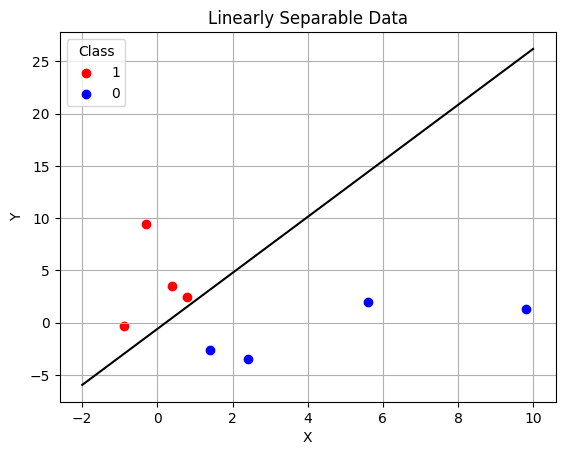

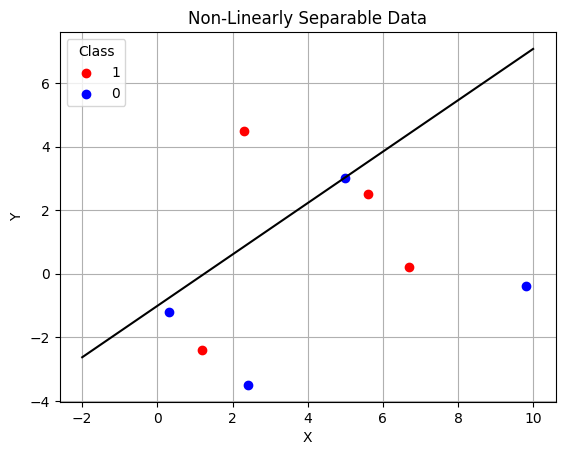

In [8]:
# Fit data
clf, X, y = Train("example1.arff")

# Get Slope/Intercept
w1 = clf.coef_[0][0]
w2 = clf.coef_[0][1]
slope = -w1/w2
intercept = -clf.intercept_/w2

# Add boundary line
xlist = np.linspace(-2,10,100)
eq = slope*xlist + intercept
plt.plot(xlist,  eq, '-k', )

# Add data
plt.scatter(X[:4, 0], X[:4, 1], color='red', label='1')
plt.scatter(X[4:, 0], X[4:, 1], color='blue', label='0')

# Add title and such
plt.title("Linearly Separable Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.legend(title="Class")

# Plot
plt.show()


# Fit data
clf, X, y = Train("example2.arff")

# Get Slope/Intercept
w1 = clf.coef_[0][0]
w2 = clf.coef_[0][1]
slope = -w1/w2
intercept = -clf.intercept_/w2

# Add boundary line
xlist = np.linspace(-2,10,100)
eq = slope*xlist + intercept
plt.plot(xlist,  eq, '-k', )

# Add the data
plt.scatter(X[:4, 0], X[:4, 1], color='red', label='1')
plt.scatter(X[4:, 0], X[4:, 1], color='blue', label='0')

# Add titles and such
plt.title("Non-Linearly Separable Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.legend(title="Class")

# Plot
plt.show()

*Discussion:* The linearly separable data is split right next to one of the class 1 points. This fits with the idea that the algorithm really looks for the first possible solution that works. The non-linearly separable data surprised me. I thought that the line would go through the data points, leaving some of each point on each side. The algorithm, rather, put all the data points on one side, maximizing recall, but doing a terrible job with precision.

### 2.4 (5%) Discuss why perceptrons in general will not get perfect accuracy on non-linearly separable data

*Discussion:* Linearly separable data can be separated by a simple line splitting the data at some point. Non-linearly separable data is not able to be divided by such a line. Since the data is intermingled, the perceptron, given its two dimensions to work in, cannot get a function that can separate the data points. Adding more inputs (say by making it a quadric machine) allows the data to be separated by something other than a line, but that comes with its own problems.

## 3. Use the perceptron to learn this version of the [voting data set](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/voting-dataset.arff)

This particular task is an edited version of the standard voting set, where we have replaced all the “don’t know” values with the most common value for the particular attribute. Look at the [tutorial](https://github.com/cs472ta/CS472/blob/master/Tutorial.ipynb) from the Labs Content page to see examples of prepping the voting data set for sklearn.

### 3.1 (10%) Average final training and test set accuracy over multiple trials

- Learn the voting data five times with different random 70/30 Training/Test splits each time
- Use a learning rate of 1.  The other hyperparameters are up to you.
- Report the 5 trials and the average training and test accuracy and number of epochs to converge across the 5 trials in a table
    - Below is an example of what a 2 trial table might look like

| Trial | Training Accuracy | Test accuracy | Number of epochs |
| --- | --- | --- | --- |
| 1 | .950 | .550 | 4 |
| 2 | .850 | .450 | 6 |
| Average | .900 | .500 | 5 |

*- As a rough sanity check, typical Perceptron test accuracies for the voting data set are 90%-98%.*


In [9]:
trainAcc = np.array([])
testAcc = np.array([])
numEpochs = np.array([])

data = arff.loadarff("voting.arff")
df = pd.DataFrame(data[0])
dfe = df.apply(LabelEncoder().fit_transform)
dnp = dfe.to_numpy()

X = dnp[:, :-1]
y = dnp[:, -1]

for i in range(5):
  Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.3)
  clf = Perceptron(shuffle=True, verbose=0, eta0=1)
  clf.fit(Xtrain,ytrain)
  trainAcc = np.append(trainAcc, clf.score(Xtrain, ytrain))
  testAcc = np.append(testAcc, clf.score(Xtest, ytest))
  numEpochs = np.append(numEpochs, clf.n_iter_)

print(trainAcc)
print(testAcc)
print(numEpochs)
print(np.mean(trainAcc))
print(np.mean(testAcc))
print(np.mean(numEpochs))


[0.9378882  0.95341615 0.96583851 0.97204969 0.94409938]
[0.94244604 0.92805755 0.97122302 0.94244604 0.89928058]
[14. 10. 20. 15. 21.]
0.9546583850931677
0.9366906474820145
16.0


### Multiple Train/Test Accuracy Results

| Trial | Training Accuracy | Test Accuracy | Number of Epochs |
| :---: | :---------------: | :-----------: | :--------------: |
|   1   |     0.95962733    |   0.95683453  |        14        |
|   2   |     0.95341615    |   0.89208633  |        12        |
|   3   |     0.9689441     |   0.97122302  |        13        |
|   4   |     0.95962733    |   0.95683453  |        11        |
|   5   |     0.92857143    |   0.95683453  |         9        |
|  Avg  |     0.94347826    |   0.94676258  |       11.8       |

### 3.2 (10%) Interpreting the Model
- Learn with the perceptron once on the full voting data set
- Look at the learned weights and bias and do your best to explain what the model has learned and how the individual input features affect the result.
- Which specific features are most critical for the voting task, and which are least critical?

In [10]:
data = arff.loadarff("voting.arff")
df = pd.DataFrame(data[0])
dfe = df.apply(LabelEncoder().fit_transform)
dnp = dfe.to_numpy()
print(dnp)

X = dnp[:, :-1]
y = dnp[:, -1]

clf = Perceptron(shuffle=True, verbose=0, eta0=1)
clf.fit(X,y)

print("Weights: ", clf.coef_)
print("Bias: ", clf.intercept_)

[[0 1 1 ... 1 1 0]
 [0 0 1 ... 0 1 1]
 [0 1 1 ... 0 0 0]
 ...
 [0 1 0 ... 0 1 1]
 [0 0 0 ... 0 1 1]
 [0 1 0 ... 0 0 1]]
Weights:  [[  0.  -3.  -8.  17.   4.  -2.   5.   6.  -7.   5. -10.  -1.  -1.   0.
   -4.   5.]]
Bias:  [-9.]


*Discussion:* The weights show that that majority of the decision about whether or not someone is Democrat or Republican has to do with the votes on only a few key issues. We see that some of the votes are not relevant at all, and that another few hold a lot of sway, with the rest being somewhere in the middle. The bias seems to tells us that the model is more likely to classify someone as Republican based on their votes (since it is so large and negative).

The least critical features are the 1st and 14th. These two have no sway on the final decision. Other features that are not so critical are the 2nd, 6th, 12th, and 13th, all of which have magnitudes much less than the rest of the features.

The most critical features are the 4th and 11th. The 4th tells a lot about whether or not someone is a Republican, and the 11th tells a lot about whether or not someone is a Democrat.

### 3.3 (15%) Misclassification rate vs epochs

Learn with the perceptron once on the full voting data set and graph the misclassification rate (number_misclassified  /  number_of_total_data_points) at each epoch until convergence (0th – final epoch).  Hints:
- For the 0th epoch (i.e. initial weights), assume the initial misclassification rate is 66% and let that be the first point on your graph. Since there are 2 output classes, random guessing would only get it right about 1/2 of the time. Missclassifcation rate is 1 - accuracy.
- Doing clf.fit with max_iter = 1, and warm_start=True will let you loop through epochs one at a time, allowing you to look at accuracy, etc. after each epoch.  But how do you know how many epochs to run until convergence?  One way is to just to first run it until convergence with random_state = c to see how many epochs it took (n_iter_).  Then run it again one epoch at a time n_iter_ times using the same random_state constant c (so that you get the exact same conditions).
- Below is a rough example of what this type of graph might look like (though this graph is for avg rate across multiple trials)

![Average Misclassification Rate](https://raw.githubusercontent.com/rmorain/CS472-1/master/images/perceptron/avg_misclassification_rate_vs_epochs.png)

Misclassifications:  [0.66       0.04989154 0.05422993 0.04338395 0.07158351 0.05422993
 0.03904555 0.02819957 0.04338395 0.04989154 0.04121475 0.02819957]


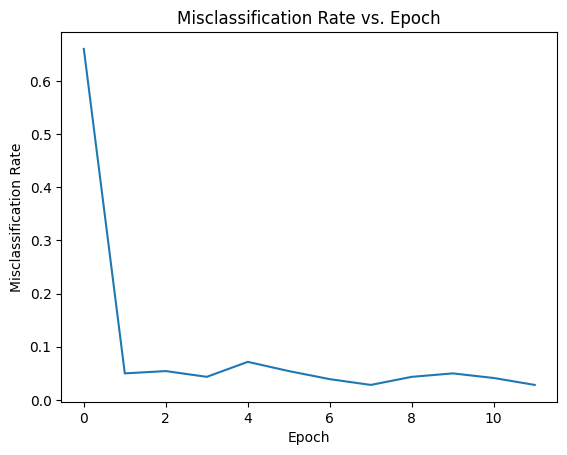

In [12]:
# Learn once on the full voting data set, while gathering info after every epoch
# Then Graph it here.  Here is some sample graph code, but you can do it your own way, including using a bar graph, etc.

def plot_misclassification(misclassification_rate):
    """
        Plots the misclassification rate
    Args:
        misclassification_rate (array-like): A 1D array or list of missclassifcation rate at every epoch
    """
    plt.plot(np.arange(len(misclassification_rate)), misclassification_rate)
    plt.title("Misclassification Rate vs. Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Misclassification Rate")
    plt.show()

misclassifications = np.array([0.66])

clf = Perceptron(eta0=0.1, random_state=123, warm_start=True, max_iter=1, shuffle=True, tol=None, verbose=0)

for i in range(11):
  clf.fit(X,y)
  misclassifications = np.append(misclassifications, 1-clf.score(X,y))

print("Misclassifications: ", misclassifications)

plot_misclassification(misclassifications)


### Misclassification Table

| Epoch | Misclassification Rate |
| :---: | :--------------------: |
|   0   |          0.66          |
|   1   |       0.04989154       |
|   2   |       0.05422993       |
|   3   |       0.04338395       |
|   4   |       0.07158351       |
|   5   |       0.05422993       |
|   6   |       0.03904555       |
|   7   |       0.02819957       |
|   8   |       0.04338395       |
|   9   |       0.04989154       |
|  10   |       0.04121475       |
|  11   |       0.02819957       |

### Discussion

I was surprised by how quickly the misclassification rate dropped with even the first epoch. We started out with 66% (though that is just what we decided and not what the program gave), then we dropped immediately to 4% and stayed around that area thereafter. I think this shows that the data is quite separable, that it is easier to predict than other data might be.


### 3.4 (15%) Hyperparameters
Read over all the Hyperparameters and their defaults in the scikit [perceptron documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html). With the voting data set, experiment briefly with EACH of the following 6 hyperparameters and discuss your findings.
- shuffle
- eta0 - learning rate
- verbose
- fit_intercept - whether to use a bias weight or not
- random state
- warm start

In [169]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)

clf = Perceptron(eta0=1, shuffle=True, random_state=123, warm_start=False)
clf.fit(Xtrain,ytrain)
print("Weights: ", clf.coef_)
print("Bias: ", clf.intercept_)
print("Train Accuracy: ", clf.score(Xtrain, ytrain))
print("Test Accuracy: ", clf.score(Xtest, ytest))

clf = Perceptron(eta0=1, shuffle=True, random_state=123, warm_start=True)
clf.fit(Xtrain,ytrain)
print("Weights: ", clf.coef_)
print("Bias: ", clf.intercept_)
print("Train Accuracy: ", clf.score(Xtrain,ytrain))
print("Test Accuracy: ", clf.score(Xtest,ytest))

Weights:  [[-1. -2. -9. 15.  3. -4.  3.  5. -6.  3. -9.  1.  0.  1. -6.  0.]]
Bias:  [-6.]
Train Accuracy:  0.9409937888198758
Test Accuracy:  0.9496402877697842
Weights:  [[-1. -2. -9. 15.  3. -4.  3.  5. -6.  3. -9.  1.  0.  1. -6.  0.]]
Bias:  [-6.]
Train Accuracy:  0.9409937888198758
Test Accuracy:  0.9496402877697842


### shuffle

- Interestingly enough, the model gets better accuracy with its data when it does not shuffle the data. This may be due to the fact that the model is overfitting the training data. Though, with repeat runs, splitting the data into test and train sets, the non-shuffle perceptron does not always do better. It seems that it only does better some of the time.
- It does seem like the majority of the time, the shuffle perceptron can generalize to novel data better than the non-shuffle perceptron. So, it does seem that shuffling the data, though it may cost some accuracy in the training model, can lead to greater accuracy with novel data.

### eta0

- I find that giving the model a larger training value gives the weights larger values in the end (though the weights with 0 seem to stay the same regardless of the training value)
- The actual accuracy of the model doesn't seem to change much (unless you give a really low eta0, in which case it gets worse)

### verbose

- This argument doesn't seem to have to do with the actual model at all. It appears that this argument exists solely to be allow us to see what is happening in the model at the end of each epoch or not.
- It seems that the `verbose` argument is similar to True/False, where 0 is false and anything else is true

### fit_intercept

- Whether or not we have a bias doesn't seem to have a conssitent result on the accuracy of this data. It appears that the perceptron where we do fit the bias is worse than the perceptron where we do not fit the bias about as often as it is better than the other.
- I think that other data sets may not show the same result, but for this data set, at least, it seems that having a bias is not that important.

### random state

- The random state value does not seem to effect the accuracy of the model predictably. Perceptrons with the same state have the same accuracy, but even increasing of decreasing the random state by 1 does not make the accuracy change to be predictably higher or lower.
- It is nice that we can use this to ensure that we are getting the same results across different trials, to compare other parts of our model and how they affect the accuracy of our predictions.

### warm start

- This argument allows us to hold the state of the machine so that we can analyze it as the training progress and do what we like with it.
- It does not appear that this argument has any effect on the accuracy of the machine, which makes sense since its job is just to hold the weights and such of the machine across fitting sessions.



## 4 (15%) Use the perceptron to learn one other data set of your choice.  
- The UC Irvine Data Repository is one great source, but you may get your data set from wherever you like, though it should be a real world task.
- Report your results

In [200]:
ds = arff.loadarff("diabetes.arff")
df = pd.DataFrame(ds[0])
dfe = df.apply(LabelEncoder().fit_transform)
dnp = dfe.to_numpy()
dnpf = dnp.astype(float)

X = dnpf[:, :-1]
y = dnpf[:, -1]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)

clf = Perceptron(shuffle=True, verbose=0, eta0=0.1)
clf.fit(Xtrain,ytrain)

print("Weights: ", clf.coef_)
print("Bias: ", clf.intercept_)
print("Train Accuracy: ", clf.score(Xtrain,ytrain))
print("Test Accuracy: ", clf.score(Xtest, ytest))

Weights:  [[ -22.2   74.  -252.9  -17.8   26.9   33.7  -11.4   54.4]]
Bias:  [-39.5]
Train Accuracy:  0.590316573556797
Test Accuracy:  0.5584415584415584


*Discussion:* This data set is related to diabetes. It has attributes such as if a person is pregnant, what their age is, and a host of other medical conditions/test results. The class here is predicitng whether someone has diabetes or does not. The accuracy of the prediciton is not nearly as good as the previous data sets. I think this has to do with the fact that diabetes is much more complicated than is political voting. I attempted to mess around with the learning rate to see what impact that could have on the final accuracy, and I found that it would not change anythin about the final accuracy. I tried splitting the data and seeing how the model would do with accuracy of predictions for novel data. I found that the novel data's accuracy was often on par with the training data, sometimes being a bit higher and sometimes a bit lower. I think this goes to show that the model is training well, given what it is, and is able to generalize well to new data, though it does so about as well as it predicts the training data.